In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), padding='SAME', strides=2,  activation='relu', input_shape=(28,28,1), data_format='channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [7]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mea = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc,mea])

In [9]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)


sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7fe41830cc88>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7fe41830ce10>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#### Load the data

In [31]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
# Print the shape of the training data

print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [37]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [35]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255
test_images = test_images / 255


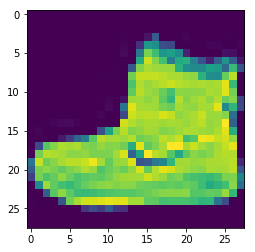

label: Ankle boot


In [38]:
# Display one of the images
i = 0 
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")


#### Fit the model

In [17]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, batch_size=256, epochs=8, verbose=2)

Train on 60000 samples
Epoch 1/8
60000/60000 - 18s - loss: 0.7310 - sparse_categorical_accuracy: 0.7498 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 - 16s - loss: 0.4670 - sparse_categorical_accuracy: 0.8328 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 - 16s - loss: 0.4318 - sparse_categorical_accuracy: 0.8439 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 - 16s - loss: 0.4105 - sparse_categorical_accuracy: 0.8519 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 - 16s - loss: 0.3991 - sparse_categorical_accuracy: 0.8560 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 - 16s - loss: 0.3892 - sparse_categorical_accuracy: 0.8598 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 - 16s - loss: 0.3837 - sparse_categorical_accuracy: 0.8607 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 16s - loss: 0.3773 - sparse_categorical_accuracy: 0.8631 - mean_absolute_error: 4.4200


#### Plot training history

In [18]:
# Load the history into a pandas Dataframe

hist_df = pd.DataFrame(history.history)
hist_df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.730952,0.749833,4.420000
1,0.467047,0.832767,4.420000
2,0.431820,0.843917,4.420000
3,0.410544,0.851933,4.419999
4,0.399090,0.856000,4.419999
5,0.389226,0.859833,4.420001
6,0.383714,0.860717,4.420000
7,0.377349,0.863117,4.420001


[Text(0.5, 0, 'Epochs')]

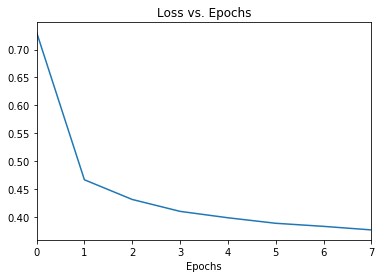

In [19]:
# Make a plot for the loss

loss_plot = hist_df.plot(y="loss", title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs')

[Text(0.5, 0, 'Epochs')]

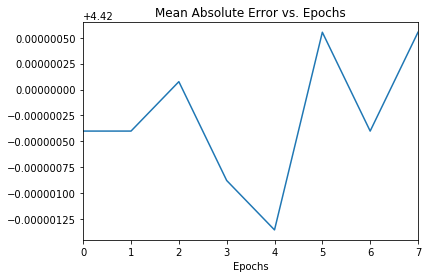

In [20]:
# Make a plot for the accuracy
sca_plot = hist_df.plot(y="mean_absolute_error", title='Mean Absolute Error vs. Epochs', legend=False)
sca_plot.set(xlabel='Epochs')

[Text(0.5, 0, 'Epochs')]

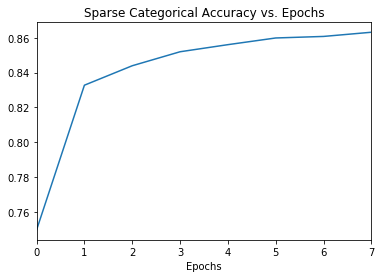

In [21]:
# Make a plot for the additional metric

mae_plot = hist_df.plot(y="sparse_categorical_accuracy", title='Sparse Categorical Accuracy vs. Epochs', legend=False)
mae_plot.set(xlabel='Epochs')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
test_loss, test_accuracy, test_mae = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 2s - loss: 0.3485 - sparse_categorical_accuracy: 0.8524 - mean_absolute_error: 4.4200


#### Evaluate the model on the test set

#### Make predictions from the model

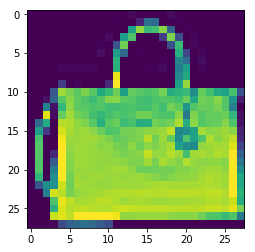

Label: Bag


In [39]:
# Choose a random test image

inx=30
test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [41]:
predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
predictions

array([[3.72358772e-06, 6.10764286e-11, 1.25123313e-06, 1.17093656e-07,
        4.43392382e-05, 1.61917892e-08, 2.87761259e-06, 6.45840881e-10,
        9.99947667e-01, 8.57327276e-09]], dtype=float32)

In [42]:
print(f"model prediction:{labels[np.argmax(predictions)]}")

model prediction:Bag
